<a href="https://colab.research.google.com/github/Jatin1895470/Deep-Learning-Assignment1/blob/main/Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


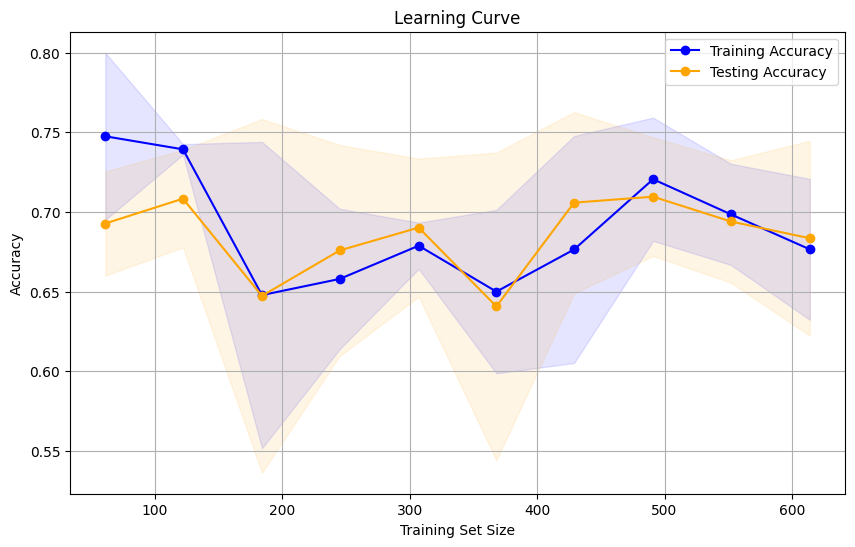

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_svmlight_file


data_path = "/content/drive/MyDrive/diabetes_scale.txt"


X, y = load_svmlight_file(data_path)


scaler = StandardScaler()
X = scaler.fit_transform(X.toarray())


model = Perceptron(max_iter=1000, tol=1e-3)


train_sizes = np.linspace(0.1, 1.0, 10)


train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, train_sizes=train_sizes, cv=5, scoring='accuracy'
)


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color='blue',
)
plt.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color='orange',
)
plt.plot(train_sizes, train_scores_mean, marker='o', color='blue', label='Training Accuracy')
plt.plot(train_sizes, test_scores_mean, marker='o', color='orange', label='Testing Accuracy')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()


